<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/20_3_Boosting_Modelsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

**Gradient boost guided example**

Having walked through gradient boost by hand, now let's try it with SKlearn. 

We'll still use the European Social Survey Data, but now with a **categorical outcome**: **Whether or not someone lives with a partner**.

In [0]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 20% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
df.shape

(8147, 13)

Since we're now working with a binary outcome, **we've switched to a classifier**. 

**Now our loss function can't be the residuals**.

 **Our options are "deviance", or "exponential**".

 **Deviance is used for logistic regression**, and we'll try that here.

In [0]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.

# *** It's best to update this table for the drill 
#  at the end of the lesson.  ***

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

**Evaluation of Model - Confusion Matrix Plot**

based on the example here:

https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

In [0]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


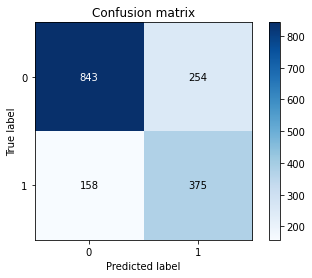

In [8]:
cm = confusion_matrix(predict_test, y_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


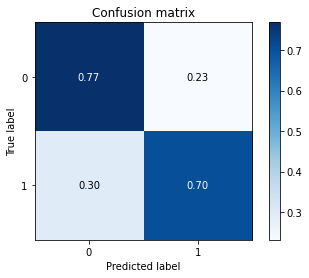

In [9]:
cm = confusion_matrix(predict_test, y_test)
plot_confusion_matrix(cm,[0,1],True)

###**Accuracy**

In [10]:
clf.score(X_test, y_test)

0.747239263803681

###**Precision**

In [11]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.7035647279549718

### **Recall**

In [12]:
recall_score(y_test,y_pred)

0.5961844197138315

Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface. But they aren't quite a black box. 

**We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision tree**s

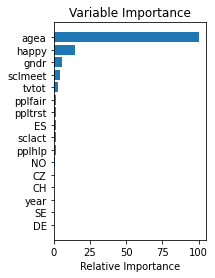

In [13]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

**DRILL: Improve this gradient boost model**


While this model is already doing alright, but there is definitely room for improvement.

**Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set**. 

Strategies you might use include:

Creating new features

Applying more overfitting-prevention strategies like subsampling

More iterations


Trying a different loss function
Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

You can learn more about the parameters for the gradient boost model here and update the params table featured earlier, before we initialized and fit the model.

A few parameters to tune could be:

learning_rate

max_depth

n_estimators

loss

subsample

min_samples_split

You can then use the same metrics to evaluate your results.

Have fun!

**///////////////////////////////////////////////////////////////////////////////////**

##**DRILL**

FIRST TRY INCREASING MAX DEPTH TO 4

In [0]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.

# *** It's best to update this table for the drill 
#  at the end of the lesson.  ***

params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


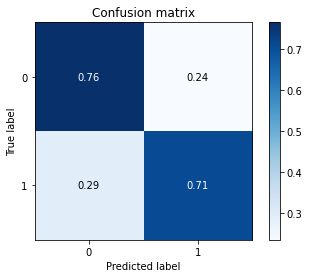

In [16]:
cm = confusion_matrix(predict_test, y_test)
plot_confusion_matrix(cm,[0,1],True)

**NOT MUCH IMPROVEMENT**

In [22]:
print(clf.score(X_test, y_test),'  ACCURACY')
y_pred = clf.predict(X_test)
print(precision_score(y_test,y_pred),'  PRECISION')
print(recall_score(y_test,y_pred),'  RECALL')

0.7466257668711657   ACCURACY
0.7084942084942085   PRECISION
0.5834658187599364   RECALL


**CHANGE ESTIMATORS TO 1000**

In [0]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.

# *** It's best to update this table for the drill 
#  at the end of the lesson.  ***

params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


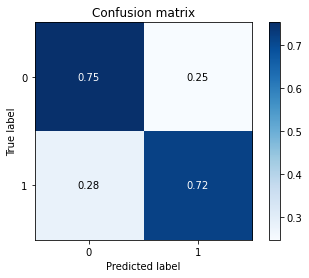

In [24]:
cm = confusion_matrix(predict_test, y_test)
plot_confusion_matrix(cm,[0,1],True)

**NOT MUCH IMPROVEMENT -- RECALL IS DOWN**

In [25]:
print(clf.score(X_test, y_test),'  ACCURACY')
y_pred = clf.predict(X_test)
print(precision_score(y_test,y_pred),'  PRECISION')
print(recall_score(y_test,y_pred),'  RECALL')

0.7423312883435583   ACCURACY
0.7181628392484343   PRECISION
0.5468998410174881   RECALL


**CHANGE LOSS TO EXPONENTIAL ![alt text](https://)**

In [0]:
params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


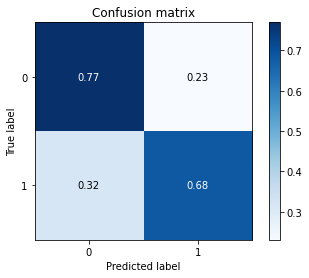

In [27]:
cm = confusion_matrix(predict_test, y_test)
plot_confusion_matrix(cm,[0,1],True)

**RECALL IMPROVED**

In [28]:
print(clf.score(X_test, y_test),'  ACCURACY')
y_pred = clf.predict(X_test)
print(precision_score(y_test,y_pred),'  PRECISION')
print(recall_score(y_test,y_pred),'  RECALL')

0.7404907975460123   ACCURACY
0.6845878136200717   PRECISION
0.6073131955484896   RECALL


**LAST CHANGE -- EXPONENTIAL -- MAX_DEPTH=6  ESTIMATORS STILL 1000**

In [0]:
params = {'n_estimators': 1000,
          'max_depth': 6,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


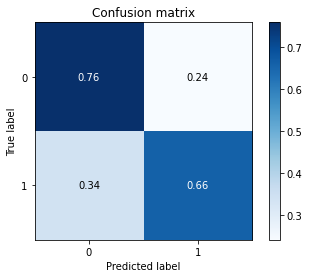

In [30]:
cm = confusion_matrix(predict_test, y_test)
plot_confusion_matrix(cm,[0,1],True)

**WORSE**

In [31]:
print(clf.score(X_test, y_test),'  ACCURACY')
y_pred = clf.predict(X_test)
print(precision_score(y_test,y_pred),'  PRECISION')
print(recall_score(y_test,y_pred),'  RECALL')

0.7263803680981595   ACCURACY
0.6625222024866785   PRECISION
0.5930047694753577   RECALL
